# Lineární advekce

Nechť $a \in \mathbb R$ a $u \in \mathbb C^1( \mathbb R^2 \to \mathbb R)$. Potom rovnici
\begin{equation}
  \frac{\partial u(x,t)}{\partial t} + a \frac{\partial u(x,t)}{\partial x} = 0
\end{equation}
nazveme **rovnicí lineární advekce**.


## Počáteční úloha pro rovnici lineární advekce

Nechť $a \in \mathbb R$ a $u_0 \in \mathbb C^1(\mathbb R \to \mathbb R)$. **Počáteční úlohou** pro rovnici advekce pak rozumíme nalézt funkci $u \in \mathbb C^1( \mathbb R\times [0,+\infty) \to \mathbb R)$ takovou, že $\forall x \in \mathbb R, \forall t>0$ je splněna rovnice 
\begin{equation}
  \frac{\partial u(x,t)}{\partial t} + a \frac{\partial u(x,t)}{\partial x} = 0
\end{equation}
a navíc je $u(x,0)=u_0(x)$.


### Analytické řešení počáteční úlohy
Analytické řešení je možné získat například pomocí metody charakteristik. Uvažujme v rovině $x-t$ nějakou křivku $x = \xi(t)$. Potom
$$
\frac{d u(\xi(t),t)}{t} = \frac{\partial u}{\partial x} \frac{d\xi}{dt} + \frac{\partial u}{\partial t}
$$
a tedy pokud $d\xi/dt = a$, je $du(xi(t),t)/dt=0$ a $u$ je na této křivce konstantní. 
Křivky splňující rovnici $d\xi/dt=a$ nazýváme **charakteristikami rovnice advekce**.
Charakteristiky jsou polopřímky $x = x_0 + a t$ a analytické řešení počáteční úlohy je 
$$
    u(x,t) = u_0(x-at).
$$


### Numerické řešení počáteční úlohy pro rovnici advekce metodou sítí

In [10]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

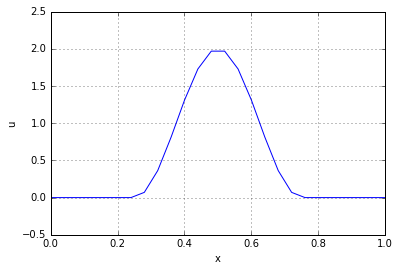

In [59]:
Nx = 26;                   # Pocet bodu site na intervalu [0,1]

x = linspace(0,1,Nx);       # Souradnice bodu site


def u0(x):
        """Definice pocatecni podminky"""
        if x<0.25 or x>0.75:
            return 0
        else:
            return cos( 2*(2*x-1.0) *pi ) + 1

            
plt.plot(x,[u0(xi) for xi in x]);
plt.ylim(-0.5,2.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u");

**Protiproudové (upwind) schéma**

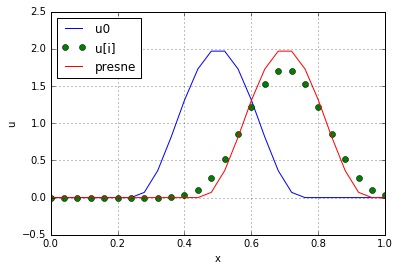

In [63]:
a = 1;                  # Rychlost advekce

dx = 1.0 / (Nx-1);      # Velikost prostoroveho 
dt = 0.5 * dx / abs(a)  # Velikost casoveho kroku

u    = array([u0(xi) for xi in x])
uNew = copy(u)

t = 0

pocet_iteraci = int(0.2 / dt) # Vypocet provedeme do casu priblizne 0.2

for n in range(pocet_iteraci):     

    for i in range(1,Nx):
        uNew[i] = u[i] - a * dt / dx * (u[i] - u[i-1])
    
    t = t + dt
    u = copy(uNew)

u_upwind = copy(u)

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,u, "o", label="u[i]");
plt.plot(x, [u0(xi-a*t) for xi in x], "-r", label="presne")
plt.ylim(-0.5,2.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper left");


**Laxovo-Friedrichsovo (Rusanovovo) schéma**

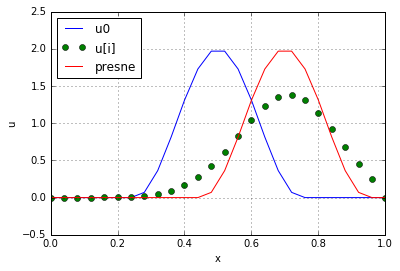

In [64]:
u    = array([u0(xi) for xi in x])
uNew = copy(u)

t = 0

for n in range(pocet_iteraci):     

    for i in range(1,Nx-1):
        uNew[i] = (u[i+1]+u[i-1])/2.0  - a * dt / (2*dx) * (u[i+1] - u[i-1])
    
    t = t + dt
    u = copy(uNew)

u_lf = copy(u)

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,u_lf, "o", label="u[i]");
plt.plot(x, [u0(xi-a*t) for xi in x], "-r", label="presne")
plt.ylim(-0.5,2.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper left");


**Laxovo-Wendroffovo schéma**

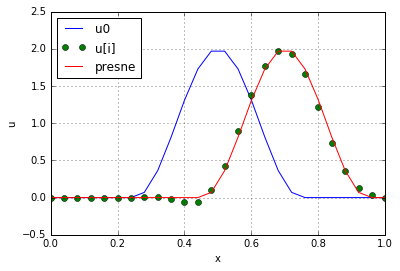

In [69]:
u    = array([u0(xi) for xi in x])
uNew = copy(u)

t = 0

pocet_iteraci = int(0.2 / dt) # Vypocet provedeme do casu priblizne 0.2

for n in range(pocet_iteraci):     

    for i in range(1,Nx-1):
        uNew[i] = u[i] - a * dt / (2*dx) * (u[i+1] - u[i-1]) + (a*dt/dx)**2/2 * (u[i+1]-2*u[i]+u[i-1])
    
    t = t + dt
    u = copy(uNew)

u_lw = copy(u)

plt.plot(x, [u0(xi) for xi in x], label="u0")
plt.plot(x,u, "o", label="u[i]");
plt.plot(x, [u0(xi-a*t) for xi in x], "-r", label="presne")
plt.ylim(-0.5,2.5); plt.grid(True); plt.xlabel("x"); plt.ylabel("u"); plt.legend(loc="upper left");
